# Dependeces

In [1]:
import os
import time
from  GPS_VK2828U7G5LF import init_gps_GPRMC,read_gps
from mpu6050 import mpu6050
import ADS1115
import board
import busio
import Jetson.GPIO as GPIO
import sys
import cv2

sys.path.append('/opt/nvidia/jetson-gpio/lib/python')
sys.path.append('/opt/nvidia/jetson-gpio/lib/python/Jetson/GPIO')

from pca9685_driver import Device

# OLED 128x64

In [2]:
from luma.core.interface.serial import i2c, spi, pcf8574
from luma.core.interface.parallel import bitbang_6800
from luma.core.render import canvas
from luma.oled.device import ssd1306, ssd1309, ssd1325, ssd1331, sh1106, ws0010

# rev.1 users set port=0
# substitute spi(device=0, port=0) below if using that interface
# substitute bitbang_6800(RS=7, E=8, PINS=[25,24,23,27]) below if using that interface
serial = i2c(port=1, address=0x3C)

# substitute ssd1331(...) or sh1106(...) below if using that device
device = ssd1306(serial)

In [3]:
with canvas(device) as draw:
    draw.rectangle(device.bounding_box, outline="white", fill="black")
    draw.text((30, 40), "Hello World", fill="white")

# camera

In [4]:
import cv2
import numpy as np
from IPython import display

cap


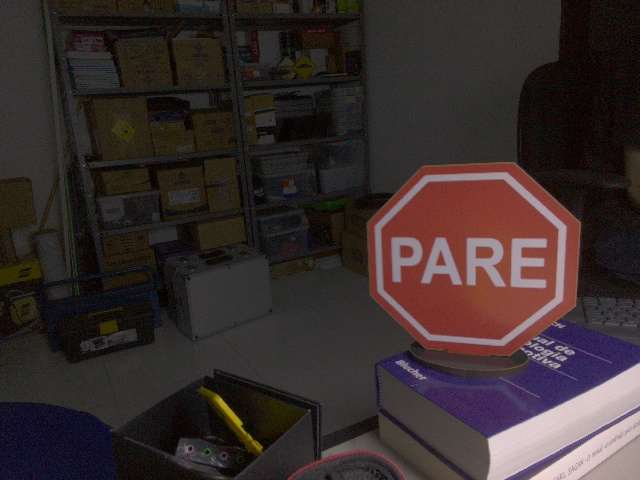

<IPython.core.display.Image object>
finish


In [5]:
def cap_video(video_index):
    try:
        cap = cv2.VideoCapture(video_index)
        print("cap")
    except:
        print("Cannot Open Device")
    ret, frame = cap.read()
    while not ret:
        ret, frame = cap.read()
    _,ret_array = cv2.imencode('.jpg', frame) 
    i = display.Image(data=ret_array)        
    display.display(i)
    print(i)
        
    cap.release()
    print("finish")
cap_video('nvarguscamerasrc ! video/x-raw(memory:NVMM), width=3280, height=2464, format=NV12, framerate=21/1 ! nvvidconv flip-method=0 ! video/x-raw, width=640, height=480, format=BGRx ! videoconvert ! video/x-raw, format=BGR ! appsink')

# Collecting data

In [2]:
import cv2
import numpy as np
from IPython import display
import os
import ipywidgets as widgets

capture video
frame shape (480, 640, 3)
video released


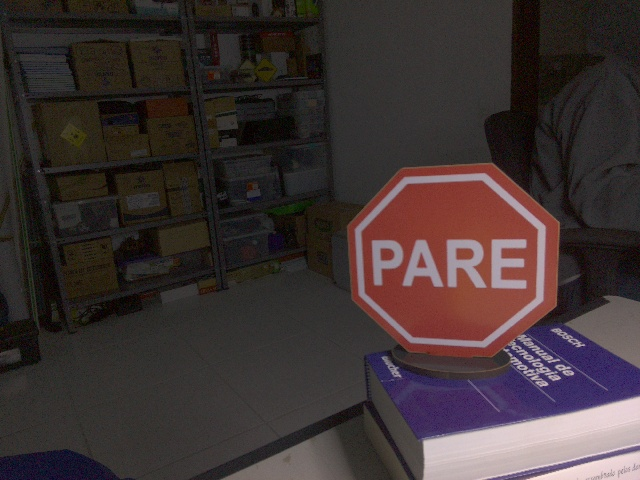

Button(description='image pare', style=ButtonStyle())

Output()

In [18]:
button = widgets.Button(description="image pare")
output = widgets.Output()

def save_image():
    try:
        cap = cv2.VideoCapture('nvarguscamerasrc ! video/x-raw(memory:NVMM), width=3280, height=2464, format=NV12, framerate=21/1 ! nvvidconv flip-method=0 ! video/x-raw, width=640, height=480, format=BGRx ! videoconvert ! video/x-raw, format=BGR ! appsink')
        print("capture video")
    except:
        print("Cannot Open Device")
    ret, frame = cap.read()
    while not ret:
        ret, frame = cap.read()
        
    ret, frame = cap.read()
    %cd /home/nano/Jetson_nano/jupyter_notebook/datasets/pare
    filename = 'pare_2.jpg'
    cv2.imwrite(filename, frame)
    print("After saving image show files:")  
    %ls
    print('Successfully saved')

def on_button_clicked(b):
    with output:
        save_image()
        print("image pare saved.")

def cap_video(video_index):
    try:
        cap = cv2.VideoCapture(video_index)
        print("capture video")
    except:
        print("Cannot Open Device")
    ret, frame = cap.read()
    while not ret:
        ret, frame = cap.read()
    
    print("frame shape",frame.shape)
    _,ret_array = cv2.imencode('.jpg', frame) 
    
    i = display.Image(data=ret_array)        
    
    cap.release()
    print("video released")
    display.display(i,button,output)   
       
cap_video('nvarguscamerasrc ! video/x-raw(memory:NVMM), width=3280, height=2464, format=NV12, framerate=21/1 ! nvvidconv flip-method=0 ! video/x-raw, width=640, height=480, format=BGRx ! videoconvert ! video/x-raw, format=BGR ! appsink')

button.on_click(on_button_clicked)

In [30]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()